# Add 50% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

outliers_utils.drop_negative_age(df)

## age

In [2]:
df = df_original.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 50)

Outliers found:


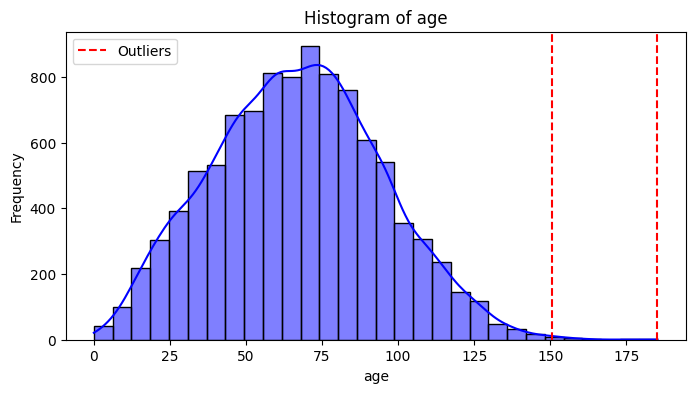

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1541
           1       0.78      0.95      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.56125, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6988\nvalue = [3412, 3576]\nclass = 1')


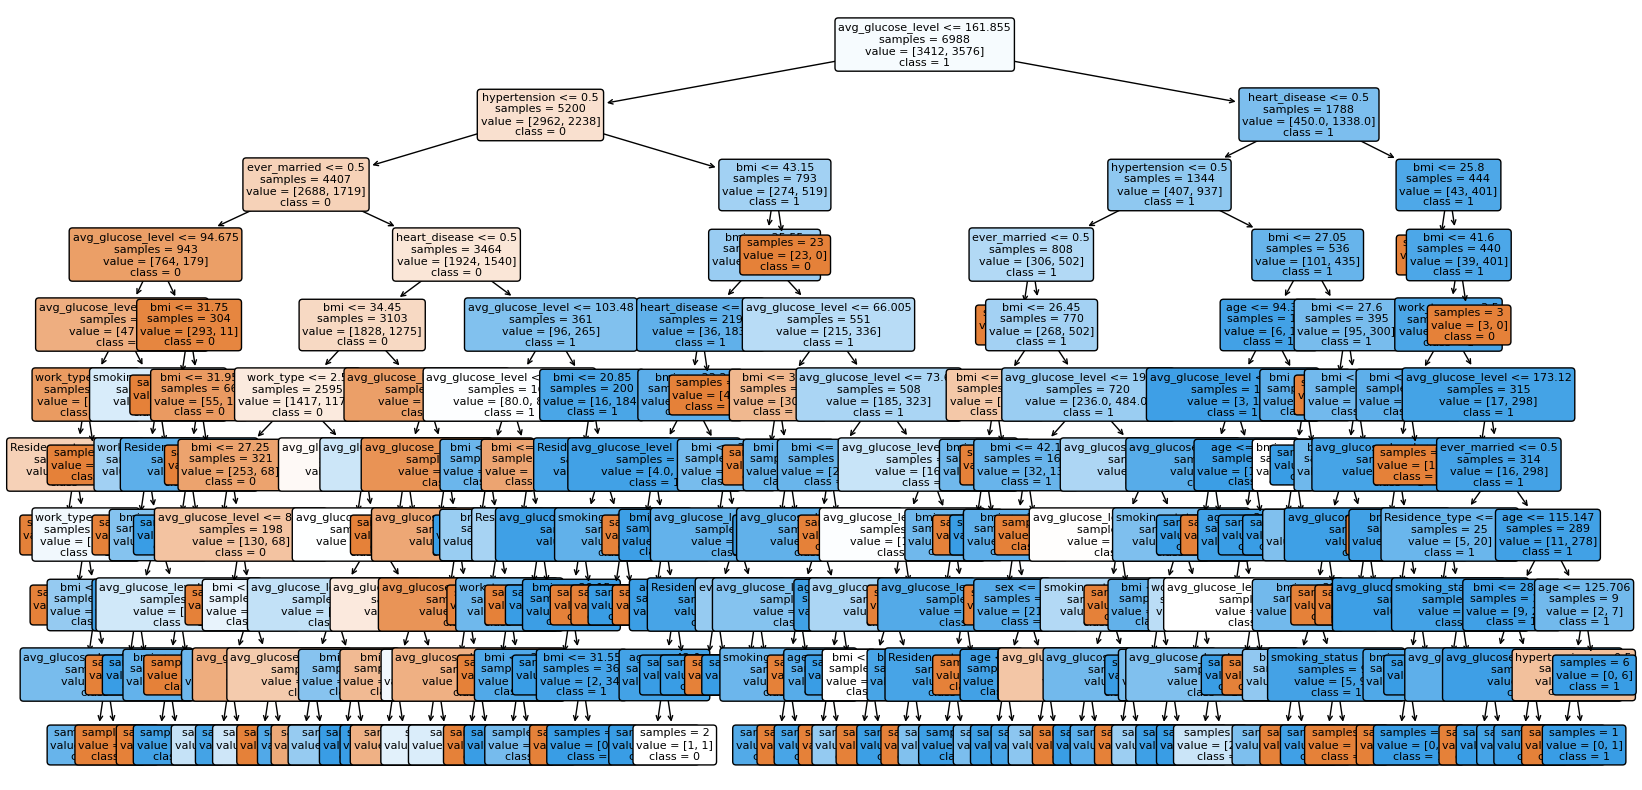

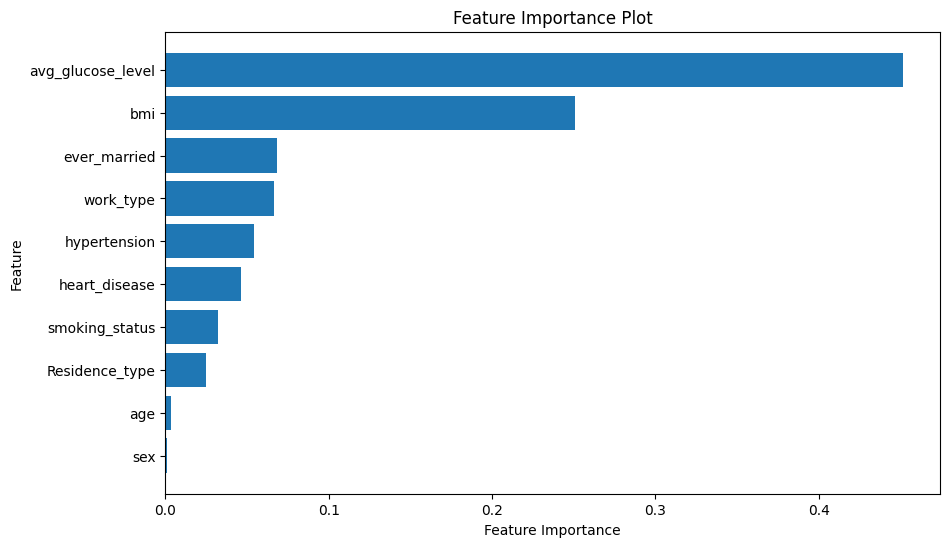

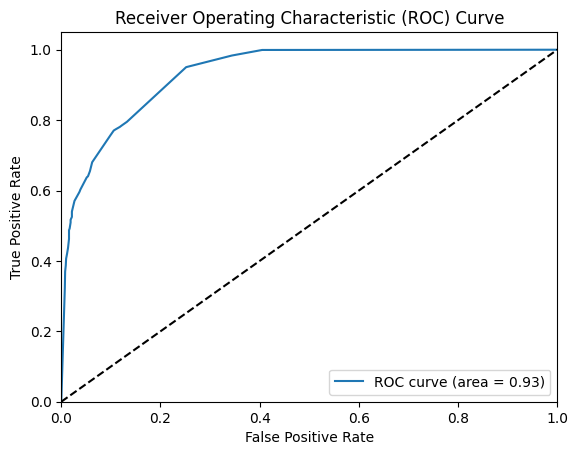

AUC Score: 0.9336087380221259


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8566666666666667, 0.8333333333333334, 0.8366666666666667, 0.8233333333333334, 0.7966666666666666, 0.8166666666666667, 0.8361204013377926, 0.7591973244147158, 0.822742474916388, 0.8327759197324415]
Mean accuracy: 0.8214169453734671
95% confidence interval: (0.8022305460597446, 0.8406033446871896)


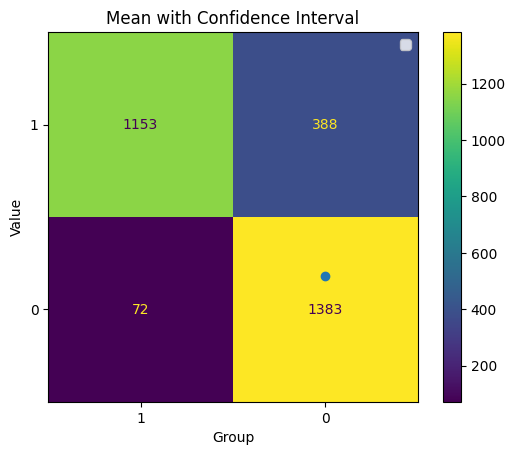

In [6]:
decision_tree = ML_algorithms.model_dt(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



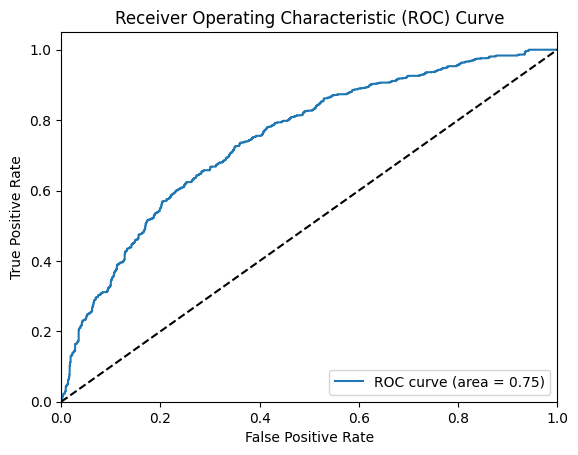

AUC Score: 0.7471896456757003


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6633333333333333, 0.6766666666666666, 0.6466666666666666, 0.6733333333333333, 0.69, 0.6666666666666666, 0.6789297658862876, 0.6923076923076923, 0.68561872909699, 0.6454849498327759]
Mean accuracy: 0.6719007803790411
95% confidence interval: (0.660117925503018, 0.6836836352550643)


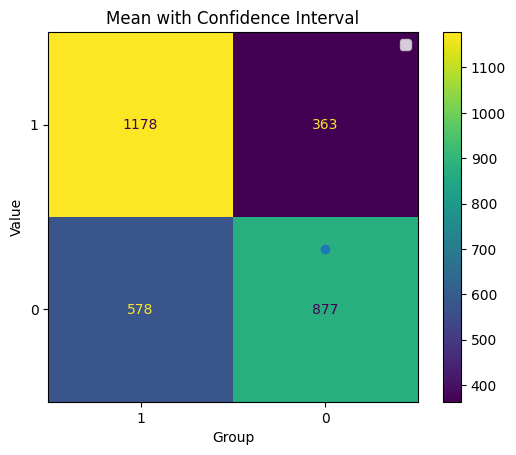

In [7]:
svm = ML_algorithms.model_svm(df_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_age, 'age')

Outliers found:


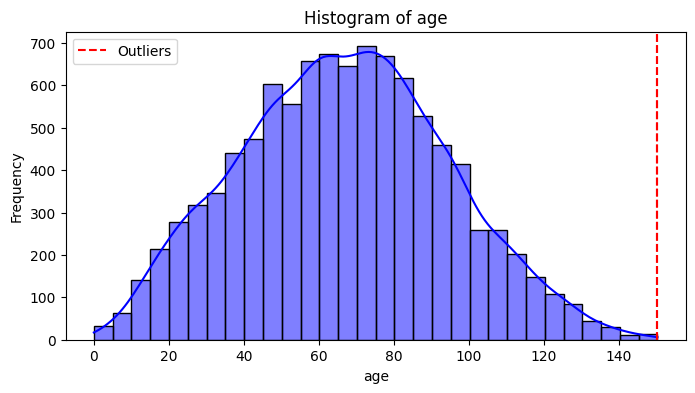

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83      1541
           1       0.78      0.95      0.86      1455

    accuracy                           0.85      2996
   macro avg       0.86      0.85      0.85      2996
weighted avg       0.86      0.85      0.85      2996

Node Labels:
 Annotation(0.56125, 0.954545, 'avg_glucose_level <= 161.855\nsamples = 6988\nvalue = [3412, 3576]\nclass = 1')


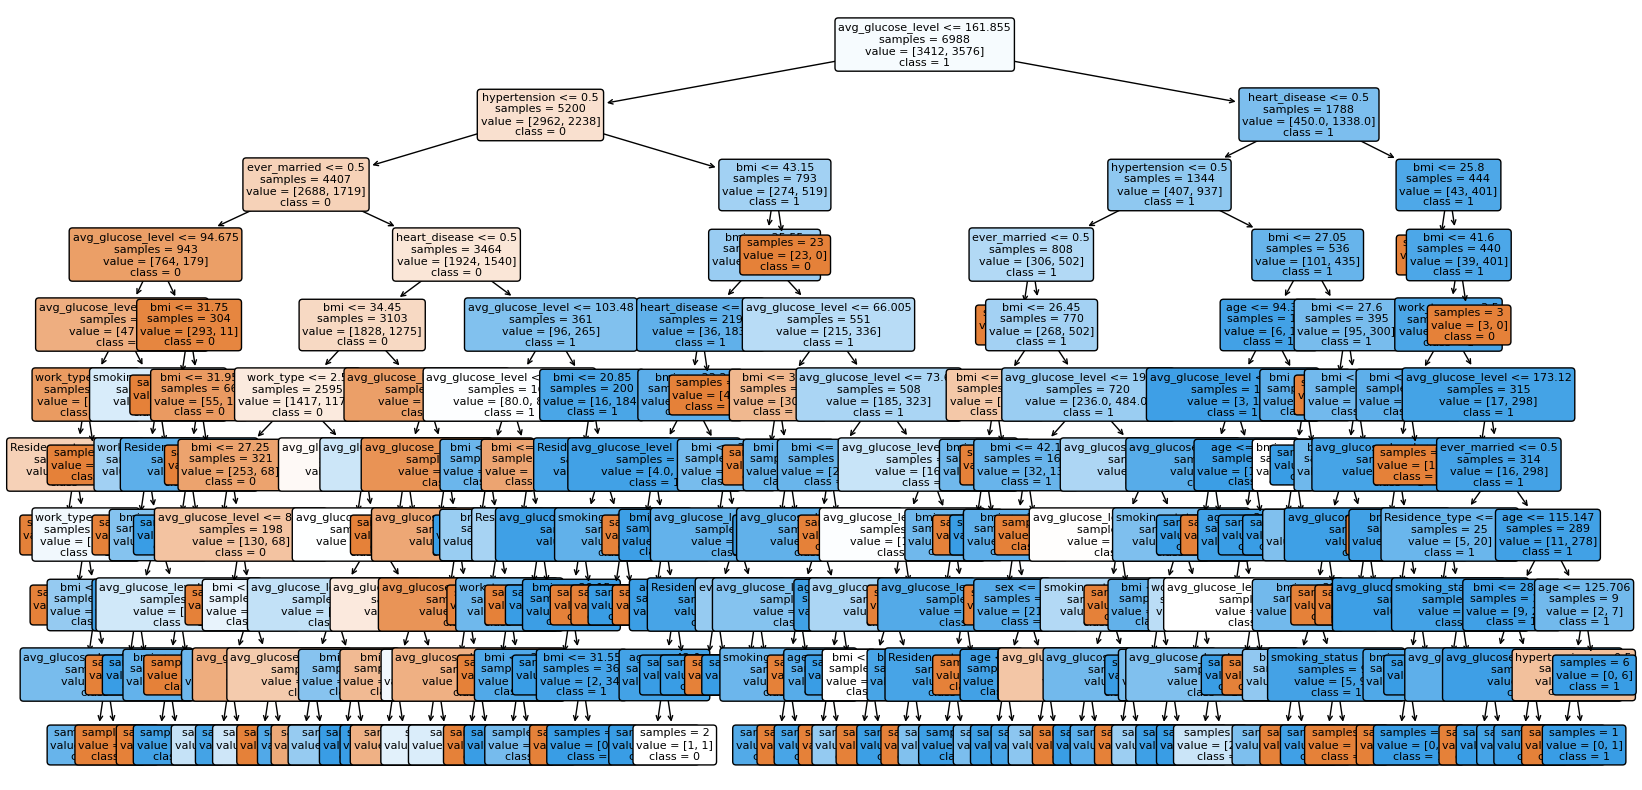

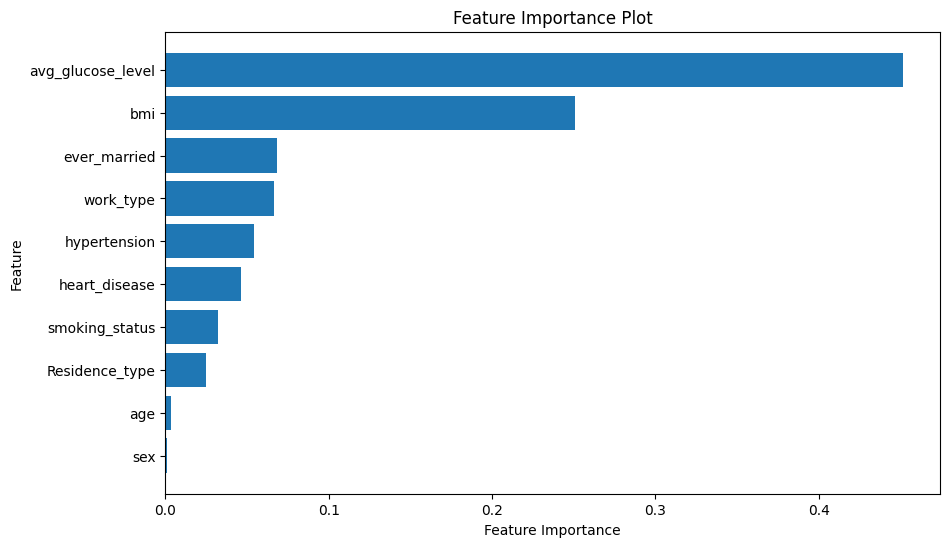

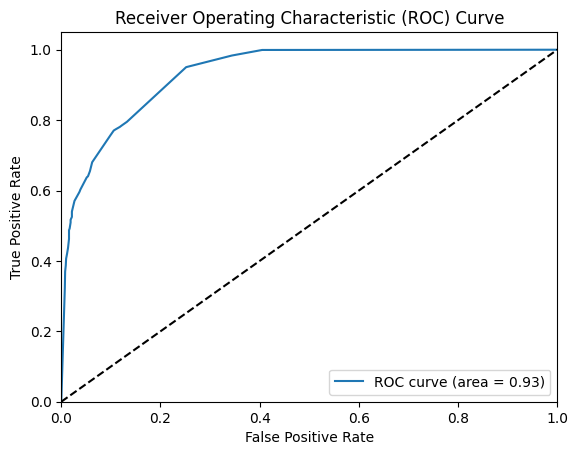

AUC Score: 0.9336087380221259


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8266666666666667, 0.85, 0.81, 0.7866666666666666, 0.7666666666666667, 0.8166666666666667, 0.7658862876254181, 0.842809364548495, 0.7959866220735786, 0.8093645484949833]
Mean accuracy: 0.8070713489409143
95% confidence interval: (0.78645118415386, 0.8276915137279686)


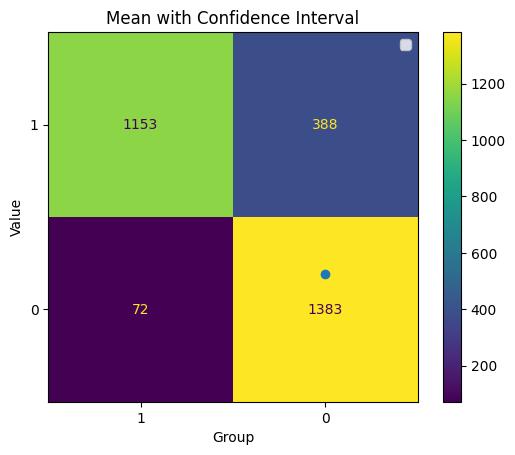

In [10]:
decision_tree = ML_algorithms.model_dt(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1541
           1       0.71      0.60      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



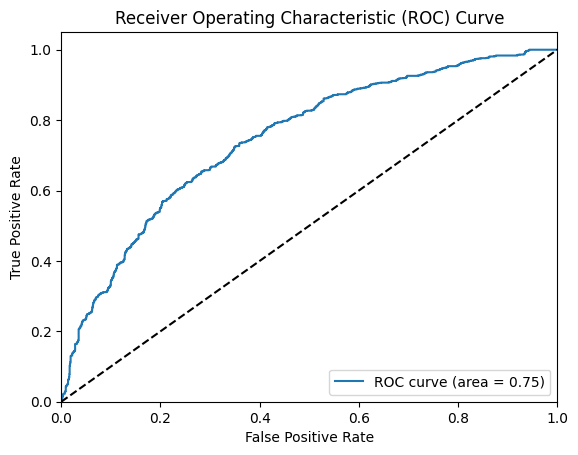

AUC Score: 0.7472650195905278


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6866666666666666, 0.7466666666666667, 0.7033333333333334, 0.5866666666666667, 0.65, 0.6433333333333333, 0.6153846153846154, 0.6655518394648829, 0.6789297658862876, 0.6789297658862876]
Mean accuracy: 0.6655462653288742
95% confidence interval: (0.6333014012488084, 0.69779112940894)


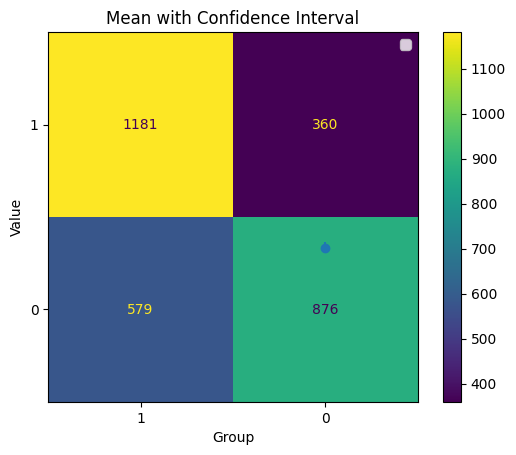

--------------------------------------


In [11]:
svm = ML_algorithms.model_svm(df_mean_age, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_original.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 50)

Outliers found:


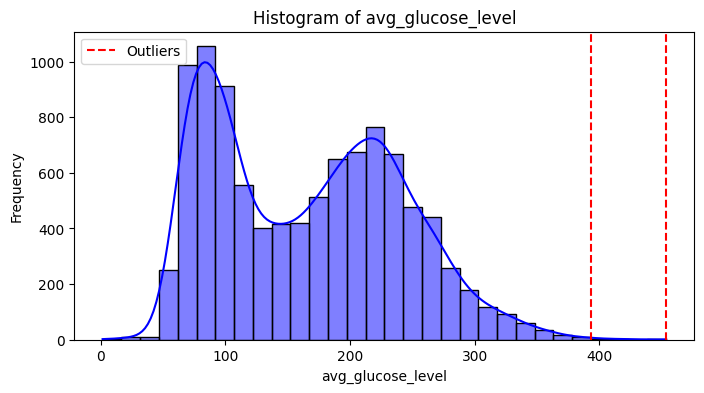

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1541
           1       0.77      0.79      0.78      1455

    accuracy                           0.78      2996
   macro avg       0.78      0.78      0.78      2996
weighted avg       0.78      0.78      0.78      2996

Node Labels:
 Annotation(0.622133, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3459, 3529]\nclass = 1')


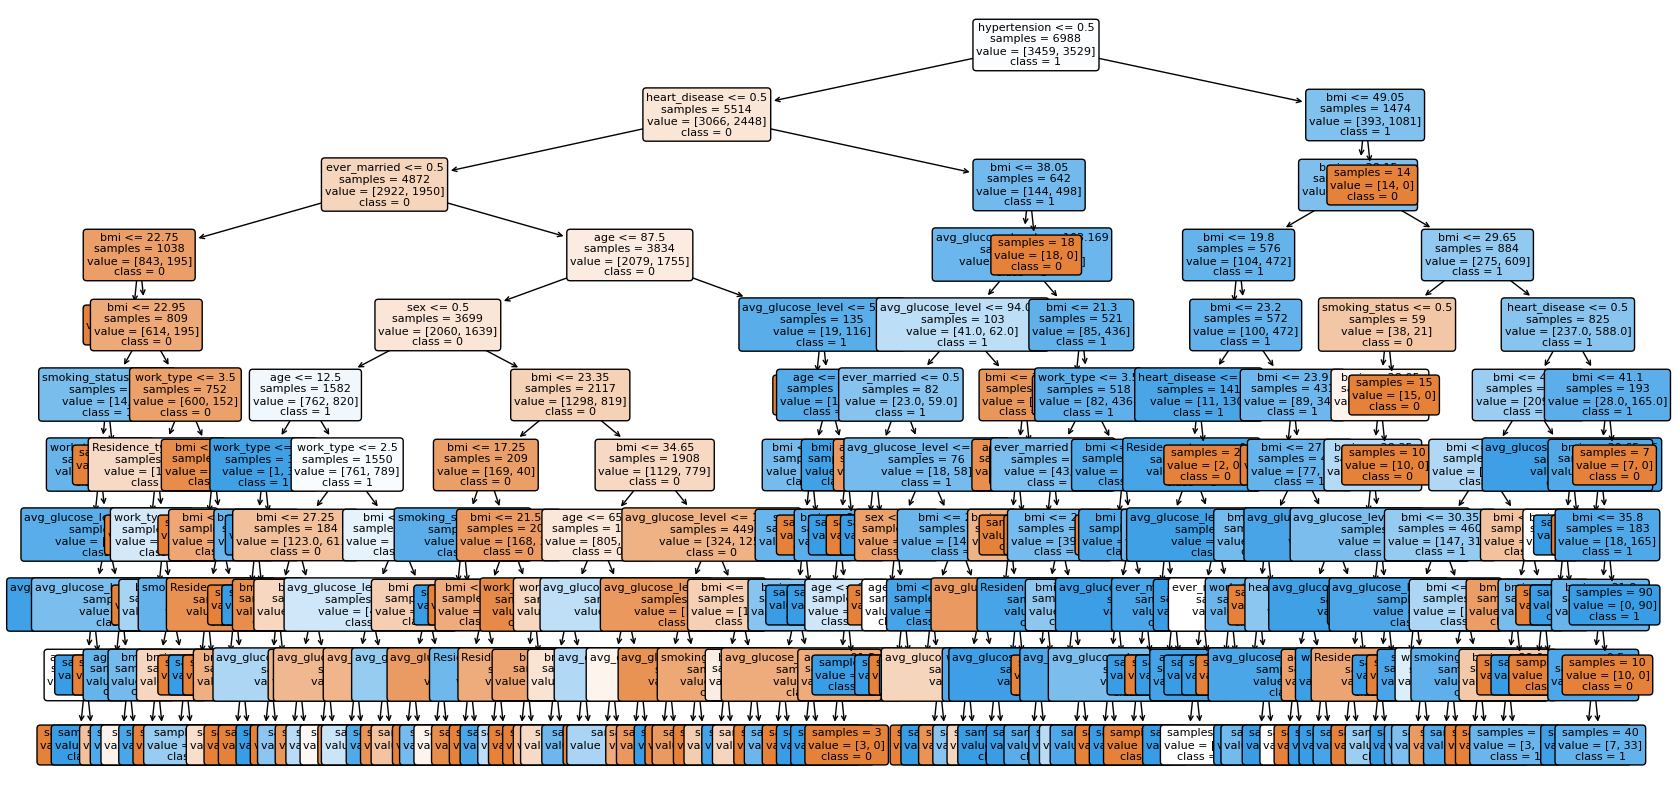

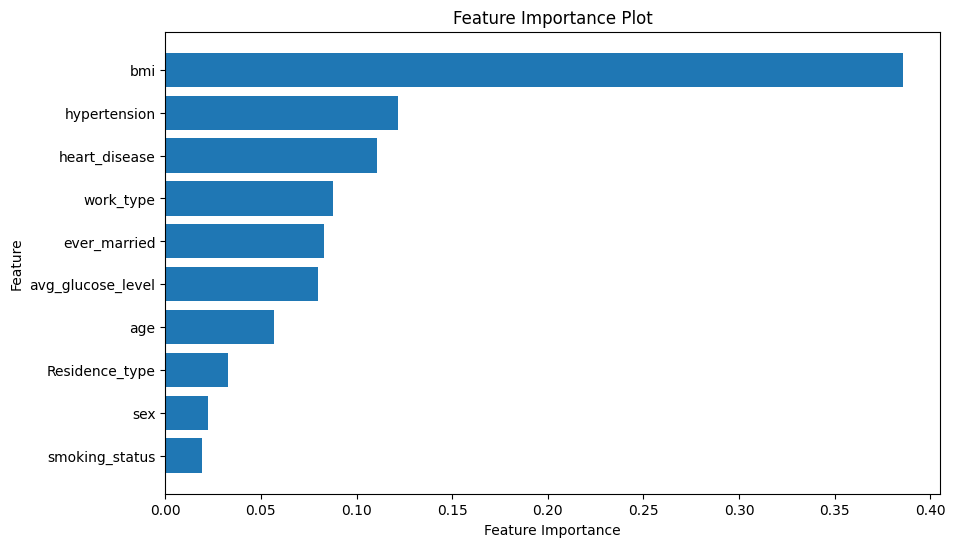

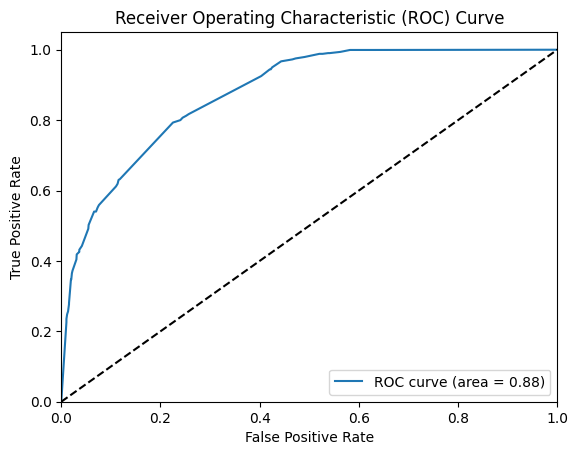

AUC Score: 0.8766175844221296


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7966666666666666, 0.7833333333333333, 0.8266666666666667, 0.7933333333333333, 0.8266666666666667, 0.8533333333333334, 0.7859531772575251, 0.8494983277591973, 0.7625418060200669, 0.8127090301003345]
Mean accuracy: 0.8090702341137124
95% confidence interval: (0.7877566236399062, 0.8303838445875186)


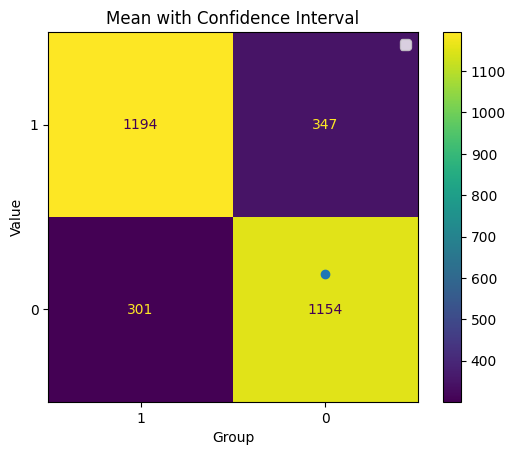

In [16]:
decision_tree = ML_algorithms.model_dt(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



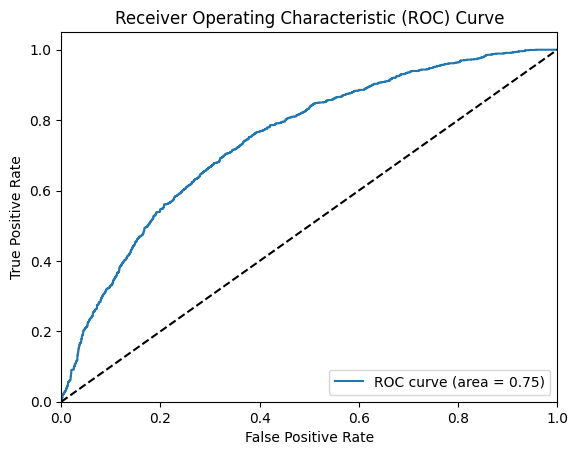

AUC Score: 0.746009977008726


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6366666666666667, 0.68, 0.72, 0.6566666666666666, 0.6666666666666666, 0.6566666666666666, 0.6387959866220736, 0.6254180602006689, 0.6755852842809364, 0.6722408026755853]
Mean accuracy: 0.6628706800445932
95% confidence interval: (0.6435472697187876, 0.6821940903703987)


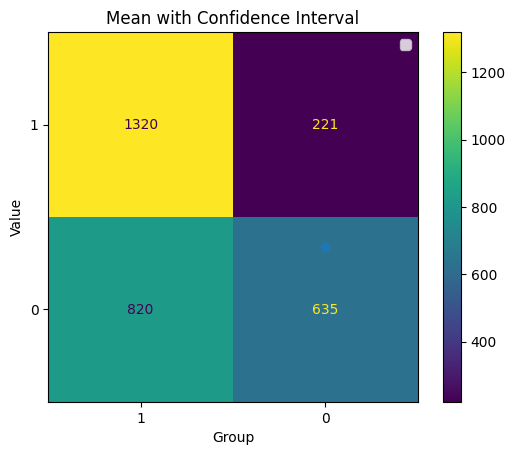

In [17]:
svm = ML_algorithms.model_svm(df_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_glucose, 'avg_glucose_level')

Outliers found:


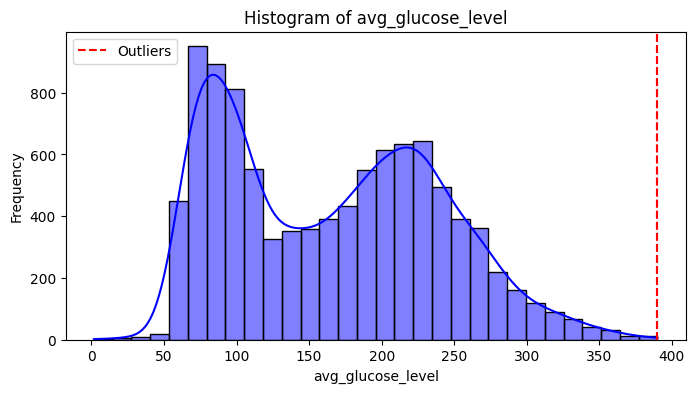

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1541
           1       0.77      0.79      0.78      1455

    accuracy                           0.78      2996
   macro avg       0.78      0.78      0.78      2996
weighted avg       0.78      0.78      0.78      2996

Node Labels:
 Annotation(0.625426, 0.954545, 'hypertension <= 0.5\nsamples = 6988\nvalue = [3459, 3529]\nclass = 1')


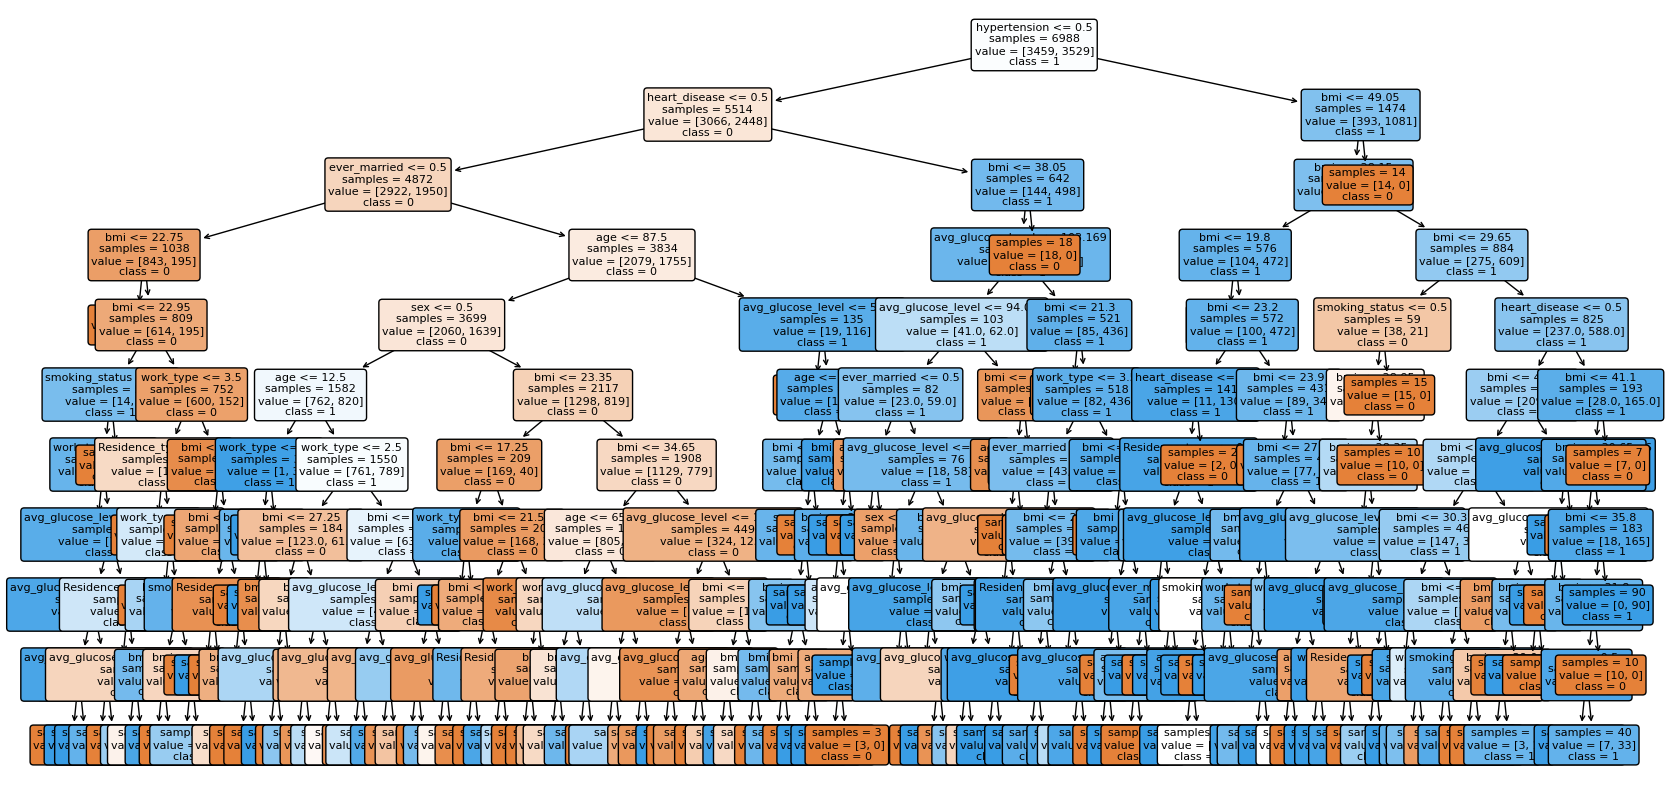

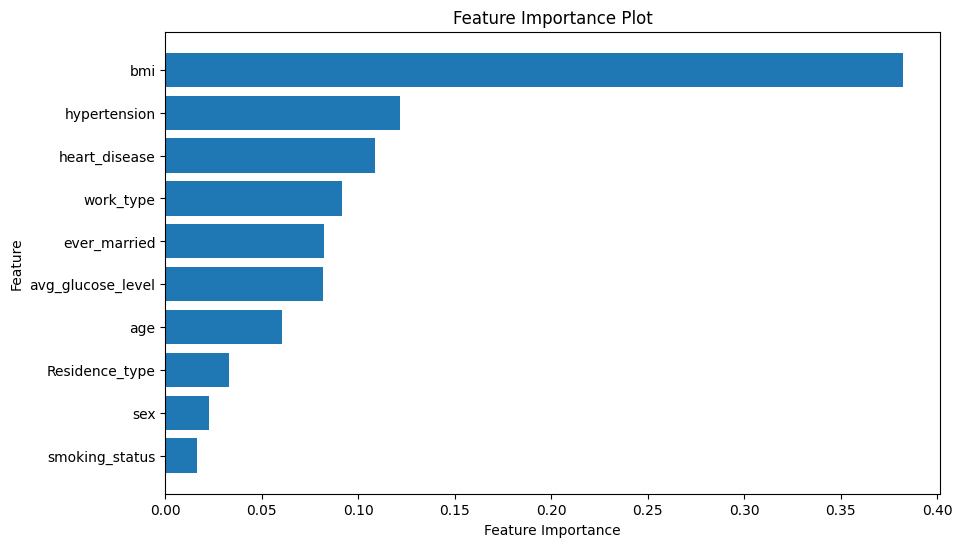

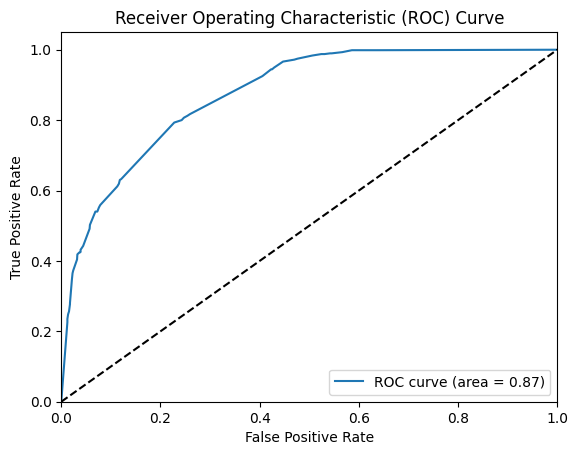

AUC Score: 0.8742696200753293


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8, 0.8333333333333334, 0.81, 0.7733333333333333, 0.84, 0.8, 0.7926421404682275, 0.7491638795986622, 0.8528428093645485, 0.8361204013377926]
Mean accuracy: 0.80874358974359
95% confidence interval: (0.7855104369342002, 0.8319767425529797)


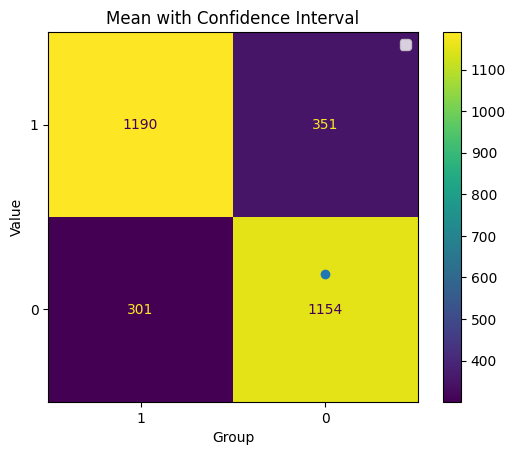

In [20]:
decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



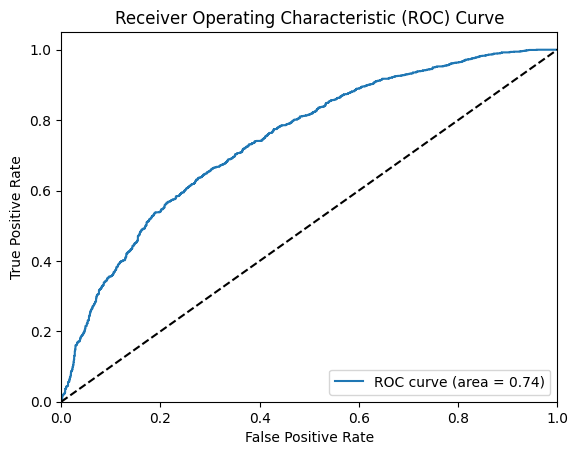

AUC Score: 0.744408392818516


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6633333333333333, 0.6866666666666666, 0.6566666666666666, 0.6866666666666666, 0.65, 0.6433333333333333, 0.7123745819397993, 0.6254180602006689, 0.6822742474916388, 0.6688963210702341]
Mean accuracy: 0.6675629877369008
95% confidence interval: (0.6494586179590194, 0.6856673575147822)


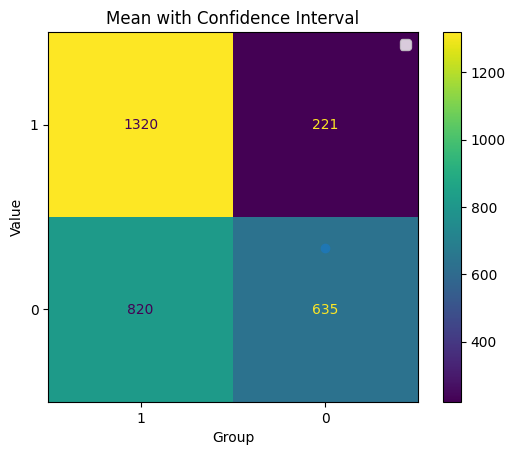

--------------------------------------


In [21]:
svm = ML_algorithms.model_svm(df_mean_glucose, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

## bmi

In [22]:
df = df_original.copy()

--------------------------------------
Outliers found:


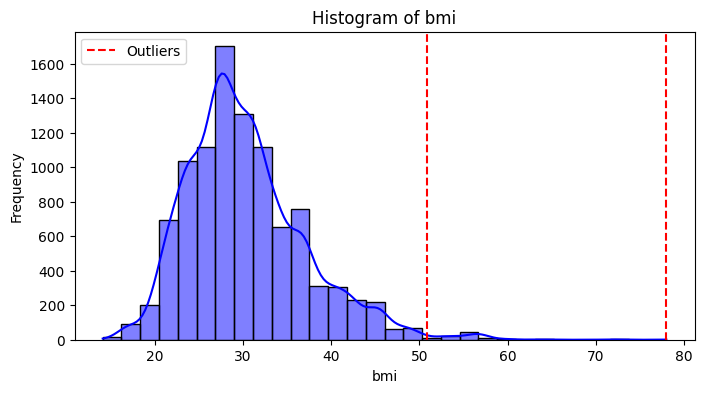

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 50)

Outliers found:


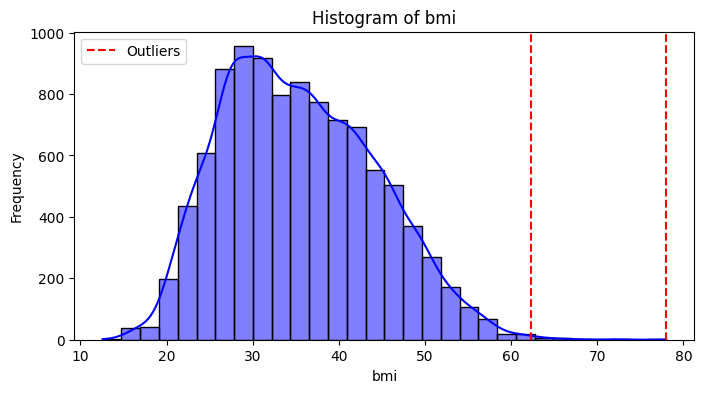

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1541
           1       0.85      0.78      0.81      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.55498, 0.954545, 'avg_glucose_level <= 171.09\nsamples = 6988\nvalue = [3480, 3508]\nclass = 1')


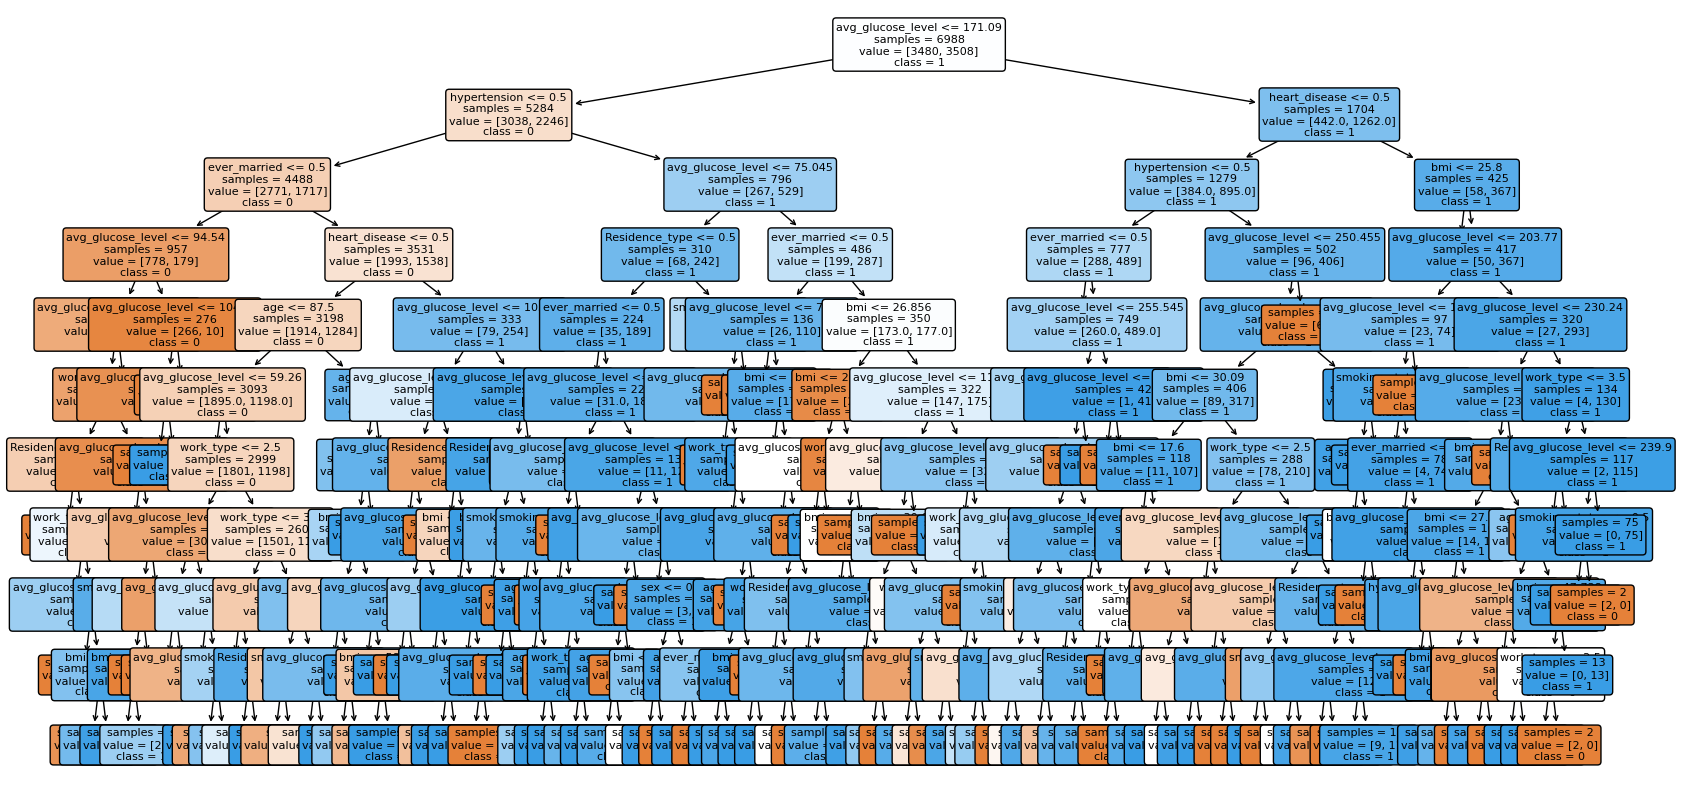

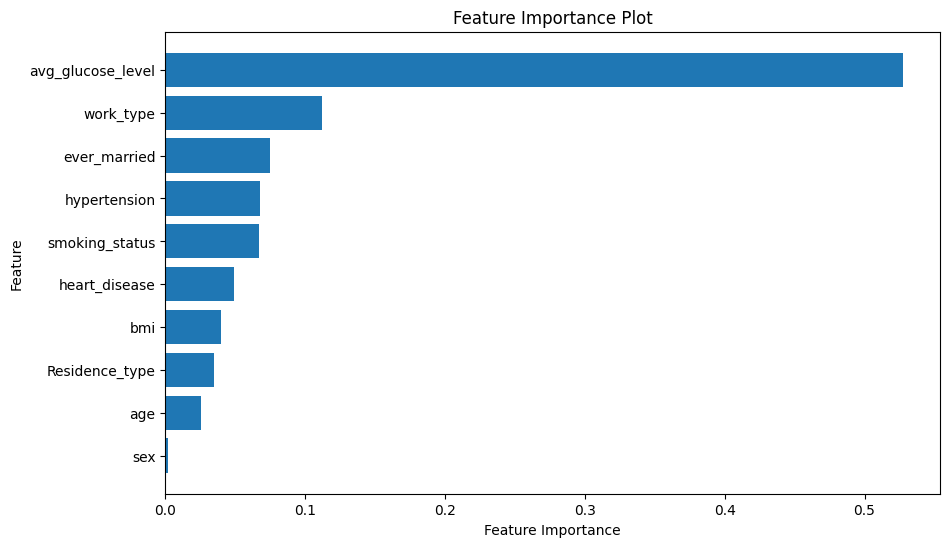

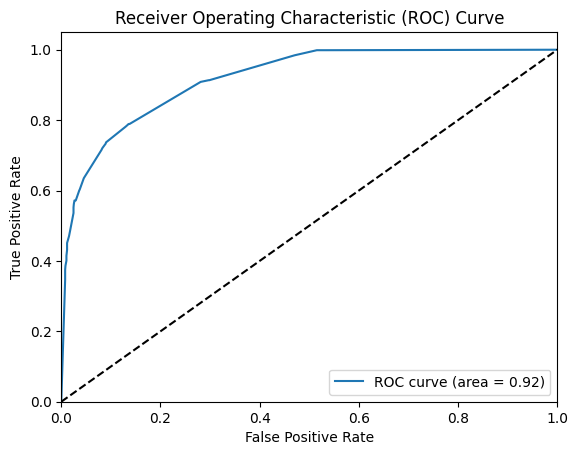

AUC Score: 0.9181615454774537


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7966666666666666, 0.8266666666666667, 0.8166666666666667, 0.8033333333333333, 0.8166666666666667, 0.7966666666666666, 0.7859531772575251, 0.8193979933110368, 0.8327759197324415, 0.802675585284281]
Mean accuracy: 0.809746934225195
95% confidence interval: (0.7990697340704828, 0.8204241343799071)


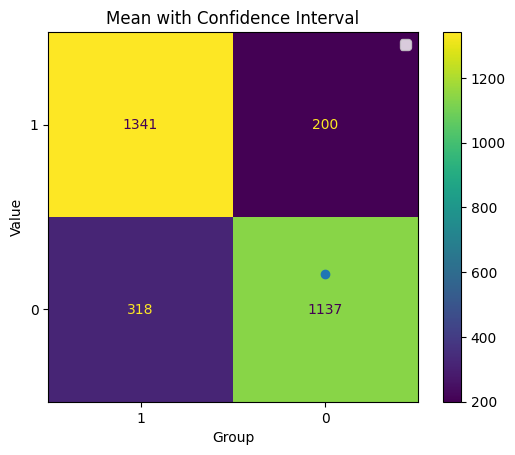

In [26]:
decision_tree = ML_algorithms.model_dt(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1541
           1       0.70      0.63      0.66      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.69      2996



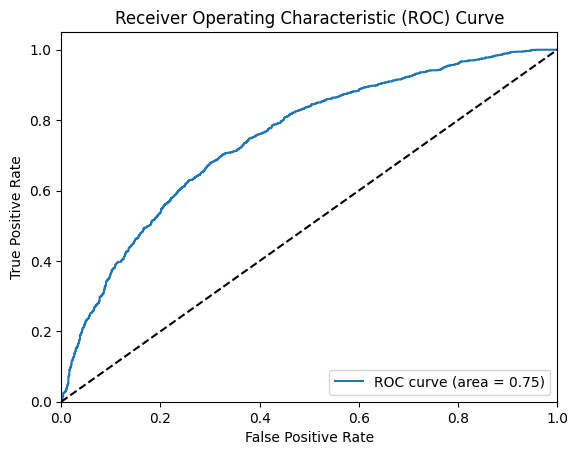

AUC Score: 0.7478501709293068


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6766666666666666, 0.6833333333333333, 0.6266666666666667, 0.6433333333333333, 0.64, 0.6766666666666666, 0.6521739130434783, 0.6956521739130435, 0.6923076923076923, 0.6889632107023411]
Mean accuracy: 0.6675763656633222
95% confidence interval: (0.649844337688801, 0.6853083936378435)


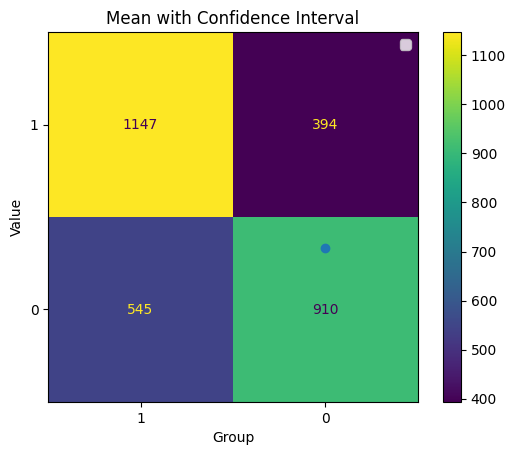

In [27]:
svm = ML_algorithms.model_svm(df_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_original, df_bmi, 'bmi')

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'age')

no outliers detected


**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1541
           1       0.85      0.78      0.81      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.55498, 0.954545, 'avg_glucose_level <= 171.09\nsamples = 6988\nvalue = [3480, 3508]\nclass = 1')


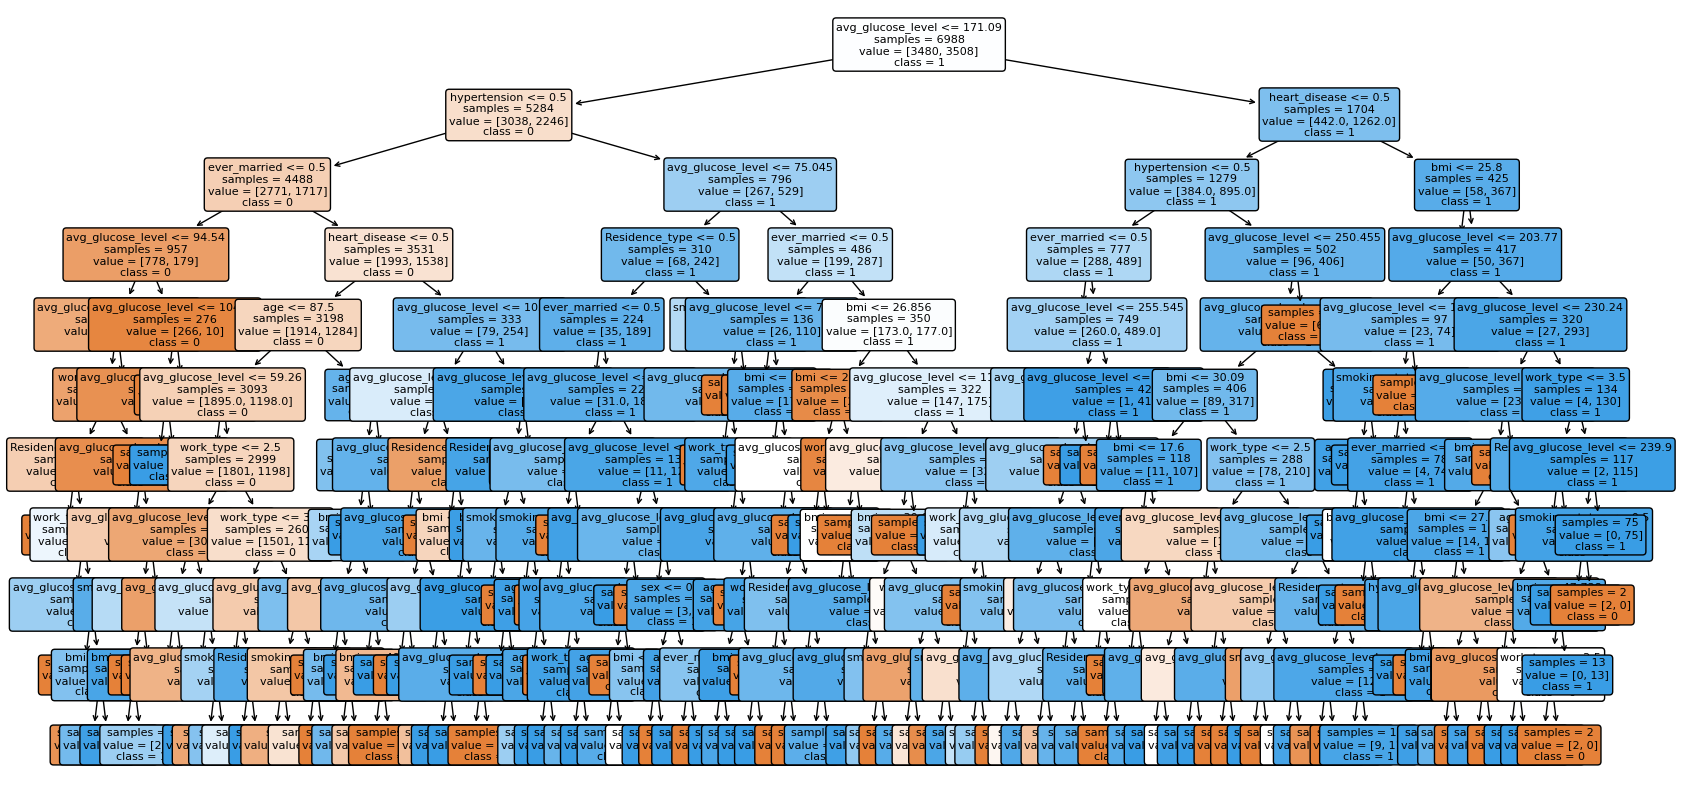

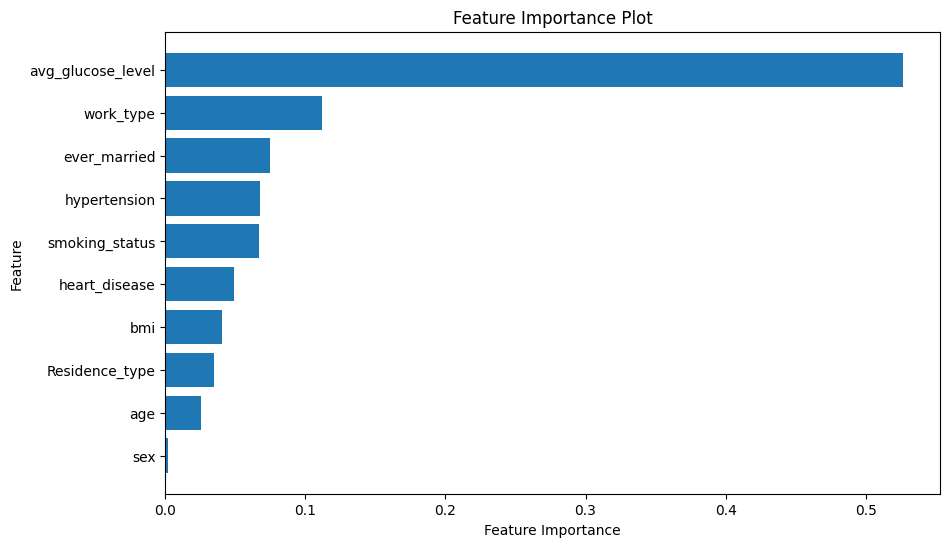

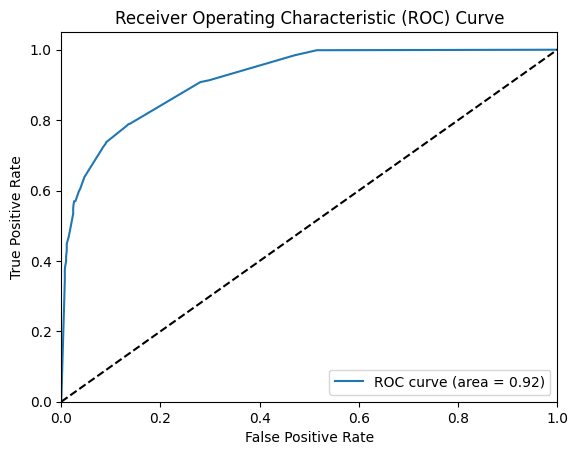

AUC Score: 0.9183691582428511


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8133333333333334, 0.7966666666666666, 0.78, 0.8133333333333334, 0.8366666666666667, 0.8166666666666667, 0.8160535117056856, 0.7658862876254181, 0.8160535117056856, 0.822742474916388]
Mean accuracy: 0.8077402452619845
95% confidence interval: (0.7926852896793719, 0.8227952008445971)


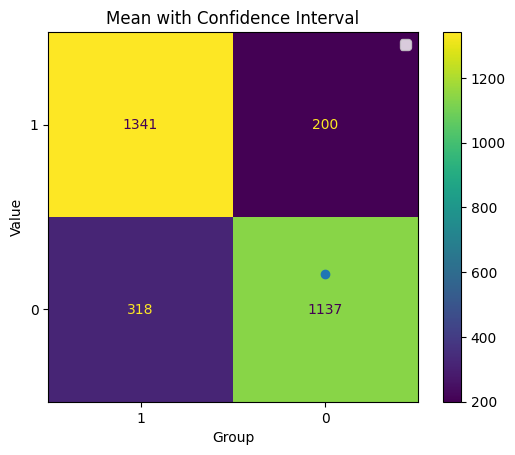

In [30]:
decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1541
           1       0.70      0.63      0.66      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.69      0.68      2996
weighted avg       0.69      0.69      0.69      2996



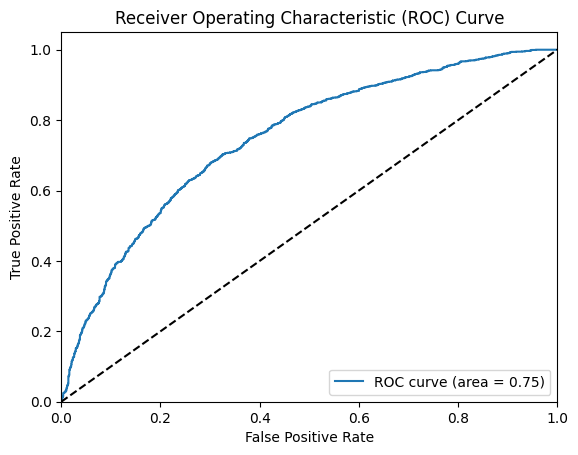

AUC Score: 0.7477975429887764


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6666666666666666, 0.7, 0.7033333333333334, 0.6633333333333333, 0.66, 0.6933333333333334, 0.6555183946488294, 0.6387959866220736, 0.6387959866220736, 0.6287625418060201]
Mean accuracy: 0.6648539576365664
95% confidence interval: (0.6459215065527393, 0.6837864087203935)


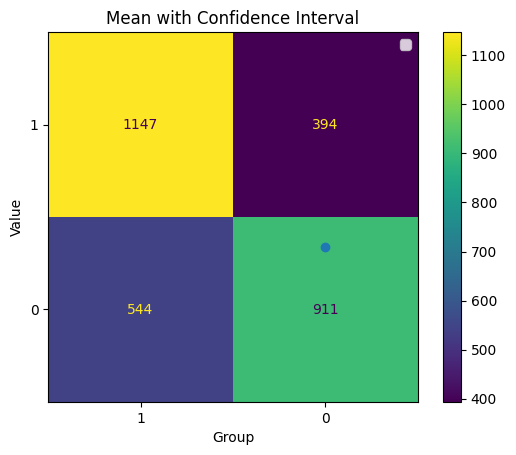

--------------------------------------


In [31]:
svm = ML_algorithms.model_svm(df_mean_bmi, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)
print('--------------------------------------')

# Categorical

In [32]:
df = df_original.copy()

--------------------------------------
Value counts:
work_type
4    6203
3    2287
2    1345
1     126
0      23
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


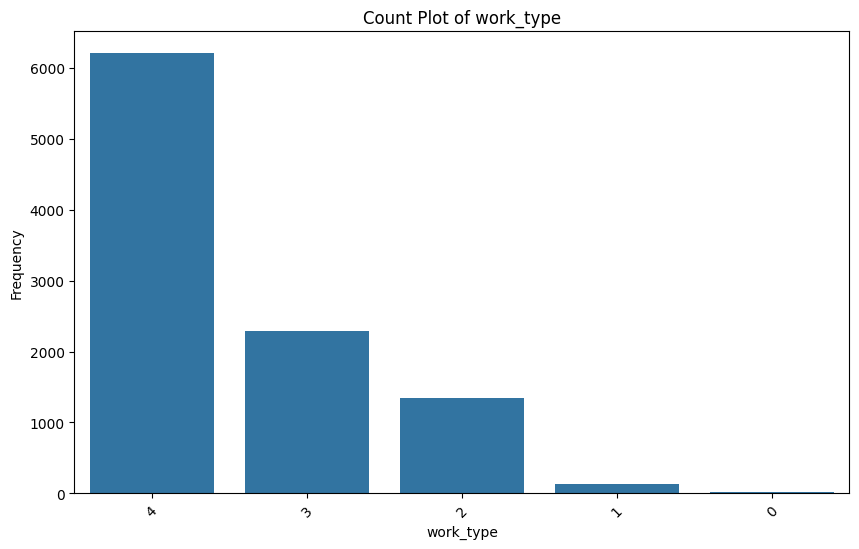

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 50, df)

Valore meno frequente:  0


Value counts:
work_type
0    5003
4    3114
3    1123
2     678
1      66
Name: count, dtype: int64
Outliers detected: [0, 4, 3, 2, 1]
Outliers found:


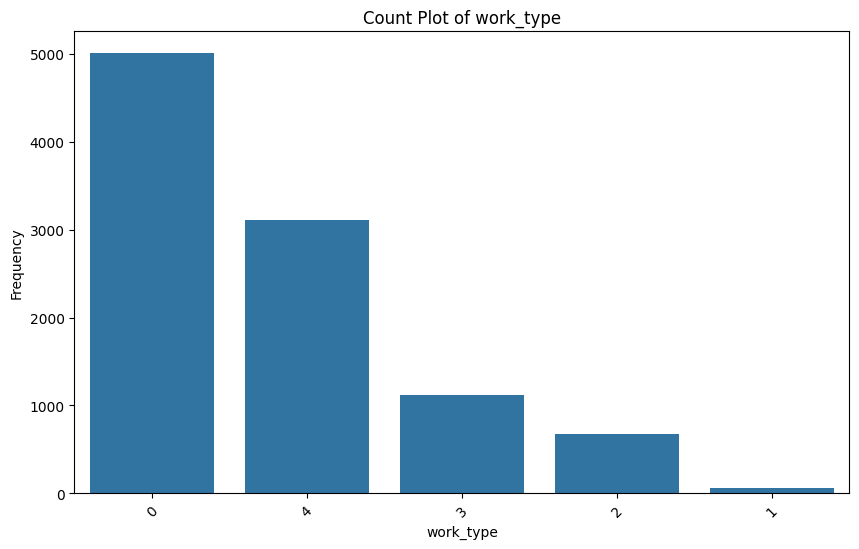

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1541
           1       0.79      0.87      0.83      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.615607, 0.954545, 'avg_glucose_level <= 170.64\nsamples = 6988\nvalue = [3458.0, 3530.0]\nclass = 1')


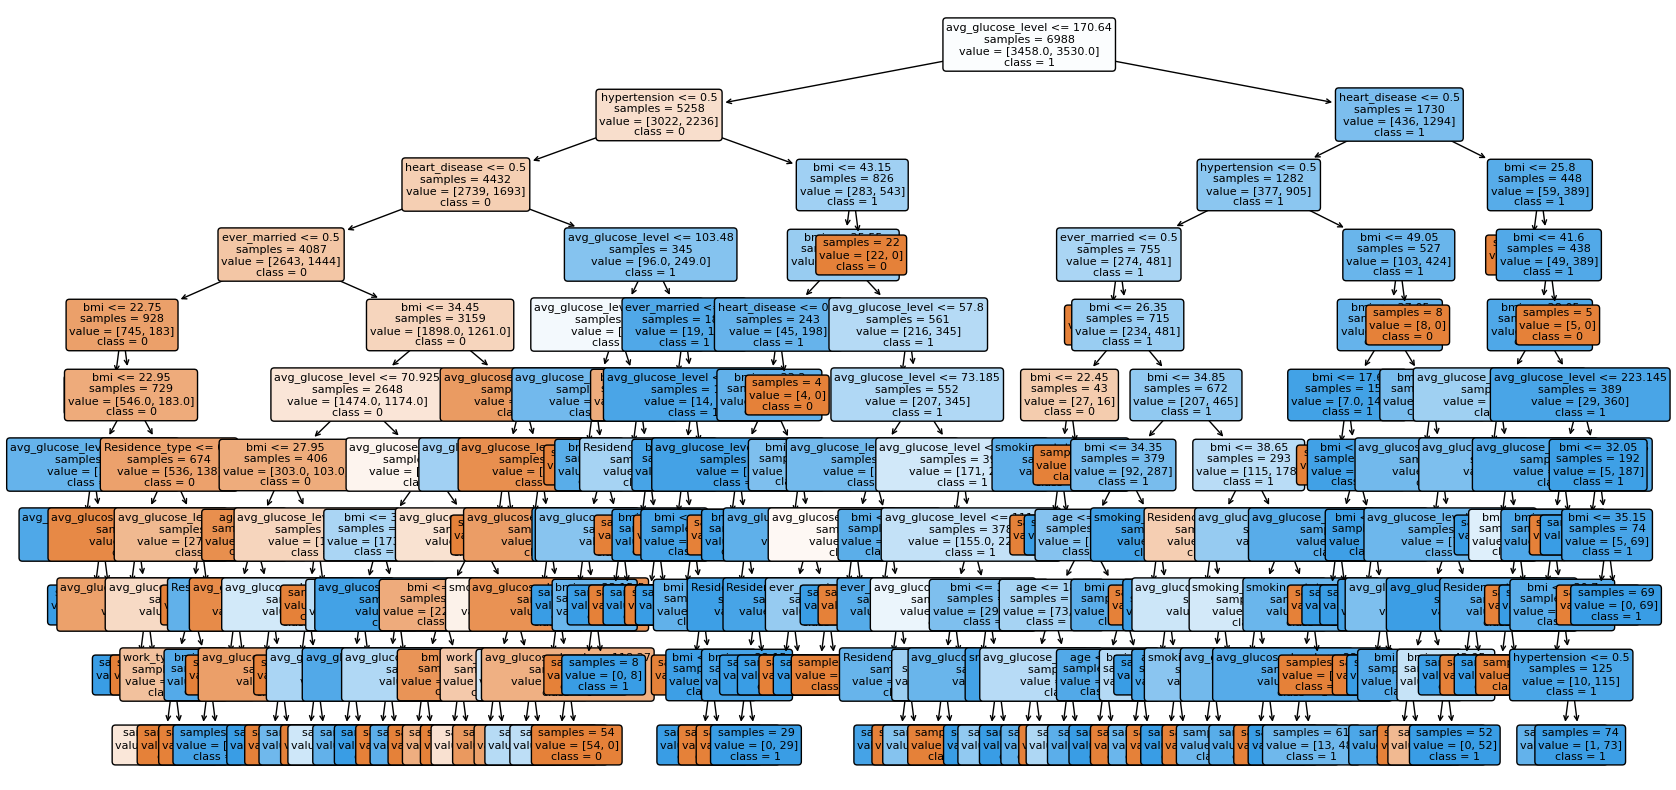

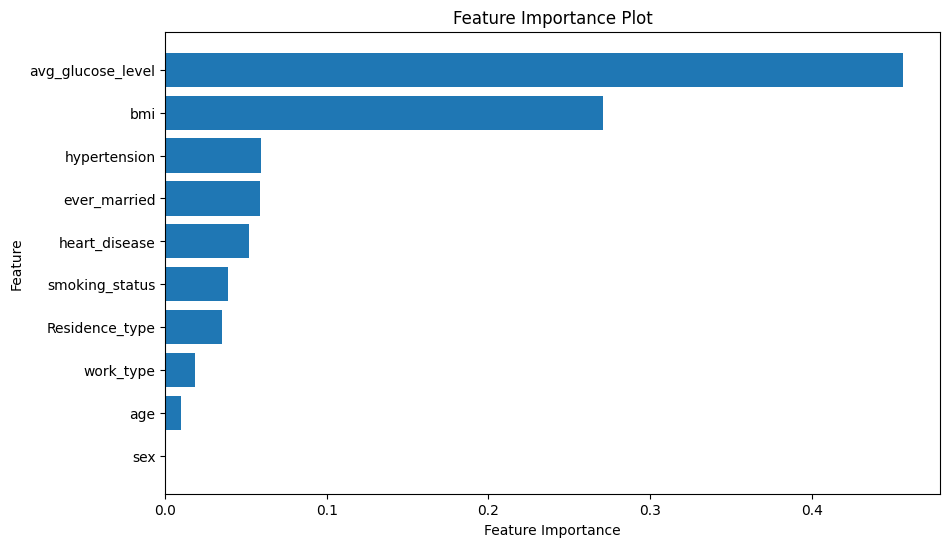

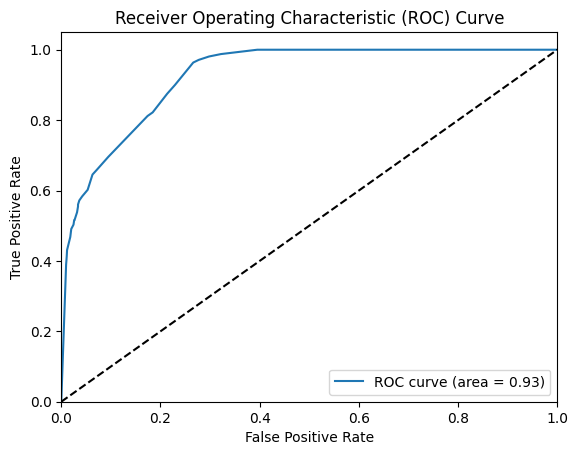

AUC Score: 0.9258064228387421


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8466666666666667, 0.8033333333333333, 0.7966666666666666, 0.75, 0.8333333333333334, 0.8366666666666667, 0.7926421404682275, 0.7993311036789298, 0.8160535117056856, 0.8060200668896321]
Mean accuracy: 0.8080713489409141
95% confidence interval: (0.7883321199253258, 0.8278105779565025)


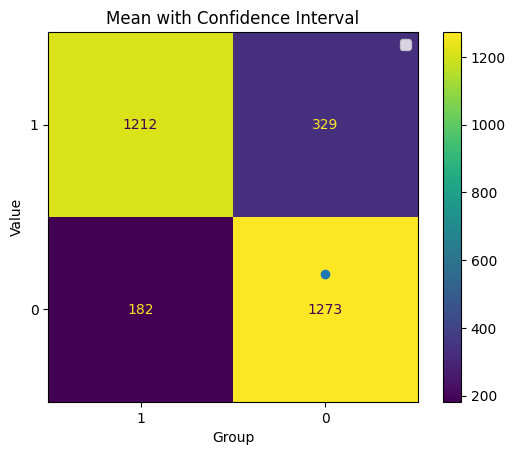

In [36]:
decision_tree = ML_algorithms.model_dt(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)

**Support Vector Machine**

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72      1541
           1       0.74      0.44      0.55      1455

    accuracy                           0.65      2996
   macro avg       0.68      0.65      0.63      2996
weighted avg       0.68      0.65      0.64      2996



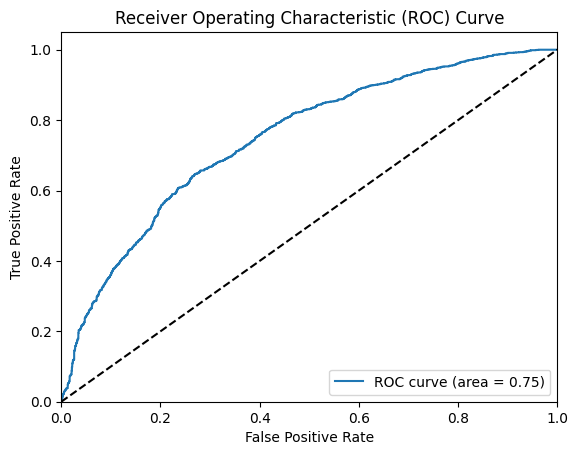

AUC Score: 0.7470099078788041


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6733333333333333, 0.72, 0.6533333333333333, 0.6333333333333333, 0.6233333333333333, 0.6733333333333333, 0.6755852842809364, 0.6722408026755853, 0.6321070234113713, 0.6622073578595318]
Mean accuracy: 0.6618807134894091
95% confidence interval: (0.6416532478172349, 0.6821081791615834)


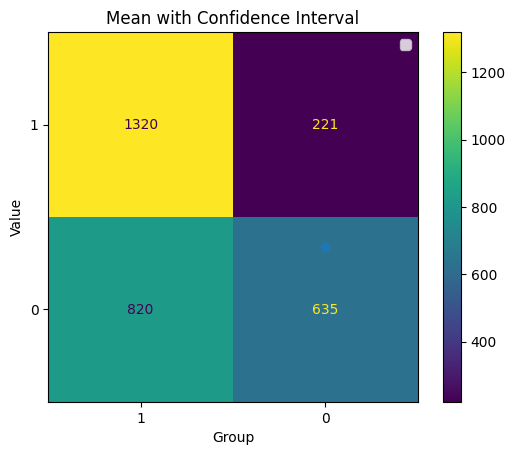

--------------------------------------


In [37]:
svm = ML_algorithms.model_svm(df_categorical, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm,df_original)

print('--------------------------------------')